# Import Libraries

In [22]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [23]:
# Loading the dataset
dataset = pd.read_csv('Data/DC_Prop_Residential_Clustering.csv', index_col= 'Unnamed: 0')
dataset = dataset.reset_index()

In [24]:
dataset.head()

,index,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,WARD,SalevYB,SalevYI
0,0,4,0,0,1,2.0,8,4,1910.0,1988.0,...,0,0,0,2.0,5,24,1680,1,93.0,31
1,1,3,1,1,1,2.0,9,5,1910.0,2009.0,...,0,1,0,2.0,4,24,1680,1,106.0,32
2,2,3,1,1,1,2.0,8,5,1900.0,2003.0,...,0,1,0,2.0,3,24,1680,1,106.0,22
3,3,3,2,1,1,1.0,10,5,1913.0,1972.0,...,0,1,0,1.0,4,11,2196,1,97.0,38
4,4,3,1,1,1,2.0,8,4,1906.0,2011.0,...,0,0,0,2.0,1,24,1627,1,105.0,39


In [25]:
data = 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'PRICE', 'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA', 'WARD', 'SalevYB', 'SalevYI'
X = dataset.loc[:2000, data].values

In [40]:
dataset.columns

Index(['index', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'WARD', 'SalevYB', 'SalevYI'],
      dtype='object')

In [26]:
dataset.shape

(57798, 31)

In [27]:
dataset.head()

,index,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,WARD,SalevYB,SalevYI
0,0,4,0,0,1,2.0,8,4,1910.0,1988.0,...,0,0,0,2.0,5,24,1680,1,93.0,31
1,1,3,1,1,1,2.0,9,5,1910.0,2009.0,...,0,1,0,2.0,4,24,1680,1,106.0,32
2,2,3,1,1,1,2.0,8,5,1900.0,2003.0,...,0,1,0,2.0,3,24,1680,1,106.0,22
3,3,3,2,1,1,1.0,10,5,1913.0,1972.0,...,0,1,0,1.0,4,11,2196,1,97.0,38
4,4,3,1,1,1,2.0,8,4,1906.0,2011.0,...,0,0,0,2.0,1,24,1627,1,105.0,39


In [28]:
X.shape

(2001, 30)

## Kmeans

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
predictions = kmeans.fit_predict(X)
# Ekstrak informasi


score_kemans_s = silhouette_score(X, kmeans.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(X, kmeans.labels_)
score_kemans_d = davies_bouldin_score(X, predictions)
score_kemans_i = kmeans.inertia_
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)
print(f'Inrtia = {score_kemans_i:.4f}')

Silhouette Score: 0.6057
Calinski Harabasz Score: 3158.6073
Davies Bouldin Score: 0.4459
Inrtia = 195461632143226.6562


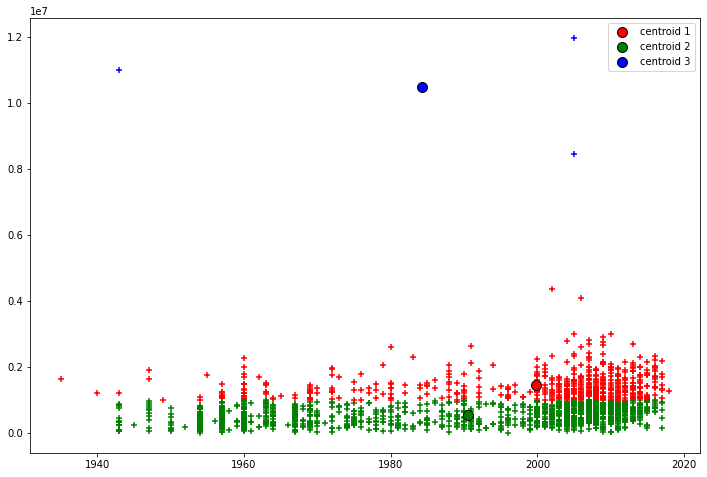

In [41]:
c_sklearn = kmeans.labels_
new_z_sklearn = kmeans.cluster_centers_

plt.figure(figsize=(12,8))
for i in range(len(c_sklearn)):
    if c_sklearn[i] == 0:
        plt.scatter(X[i,8], X[i,11], c='r', marker='+')
    elif c_sklearn[i] == 1:
        plt.scatter(X[i,8], X[i,11], c='g', marker='+')
    else:
        plt.scatter(X[i,8], X[i,11], c='b', marker='+')

plt.scatter(new_z_sklearn[0,8], new_z_sklearn[0,11], c='r', edgecolor='k', s=100, label='centroid 1')
plt.scatter(new_z_sklearn[1,8], new_z_sklearn[1,11], c='g', edgecolor='k', s=100, label='centroid 2')
plt.scatter(new_z_sklearn[2,8], new_z_sklearn[2,11], c='b', edgecolor='k', s=100, label='centroid 3')


plt.legend()
plt.show()


# Hierarchical Clustering

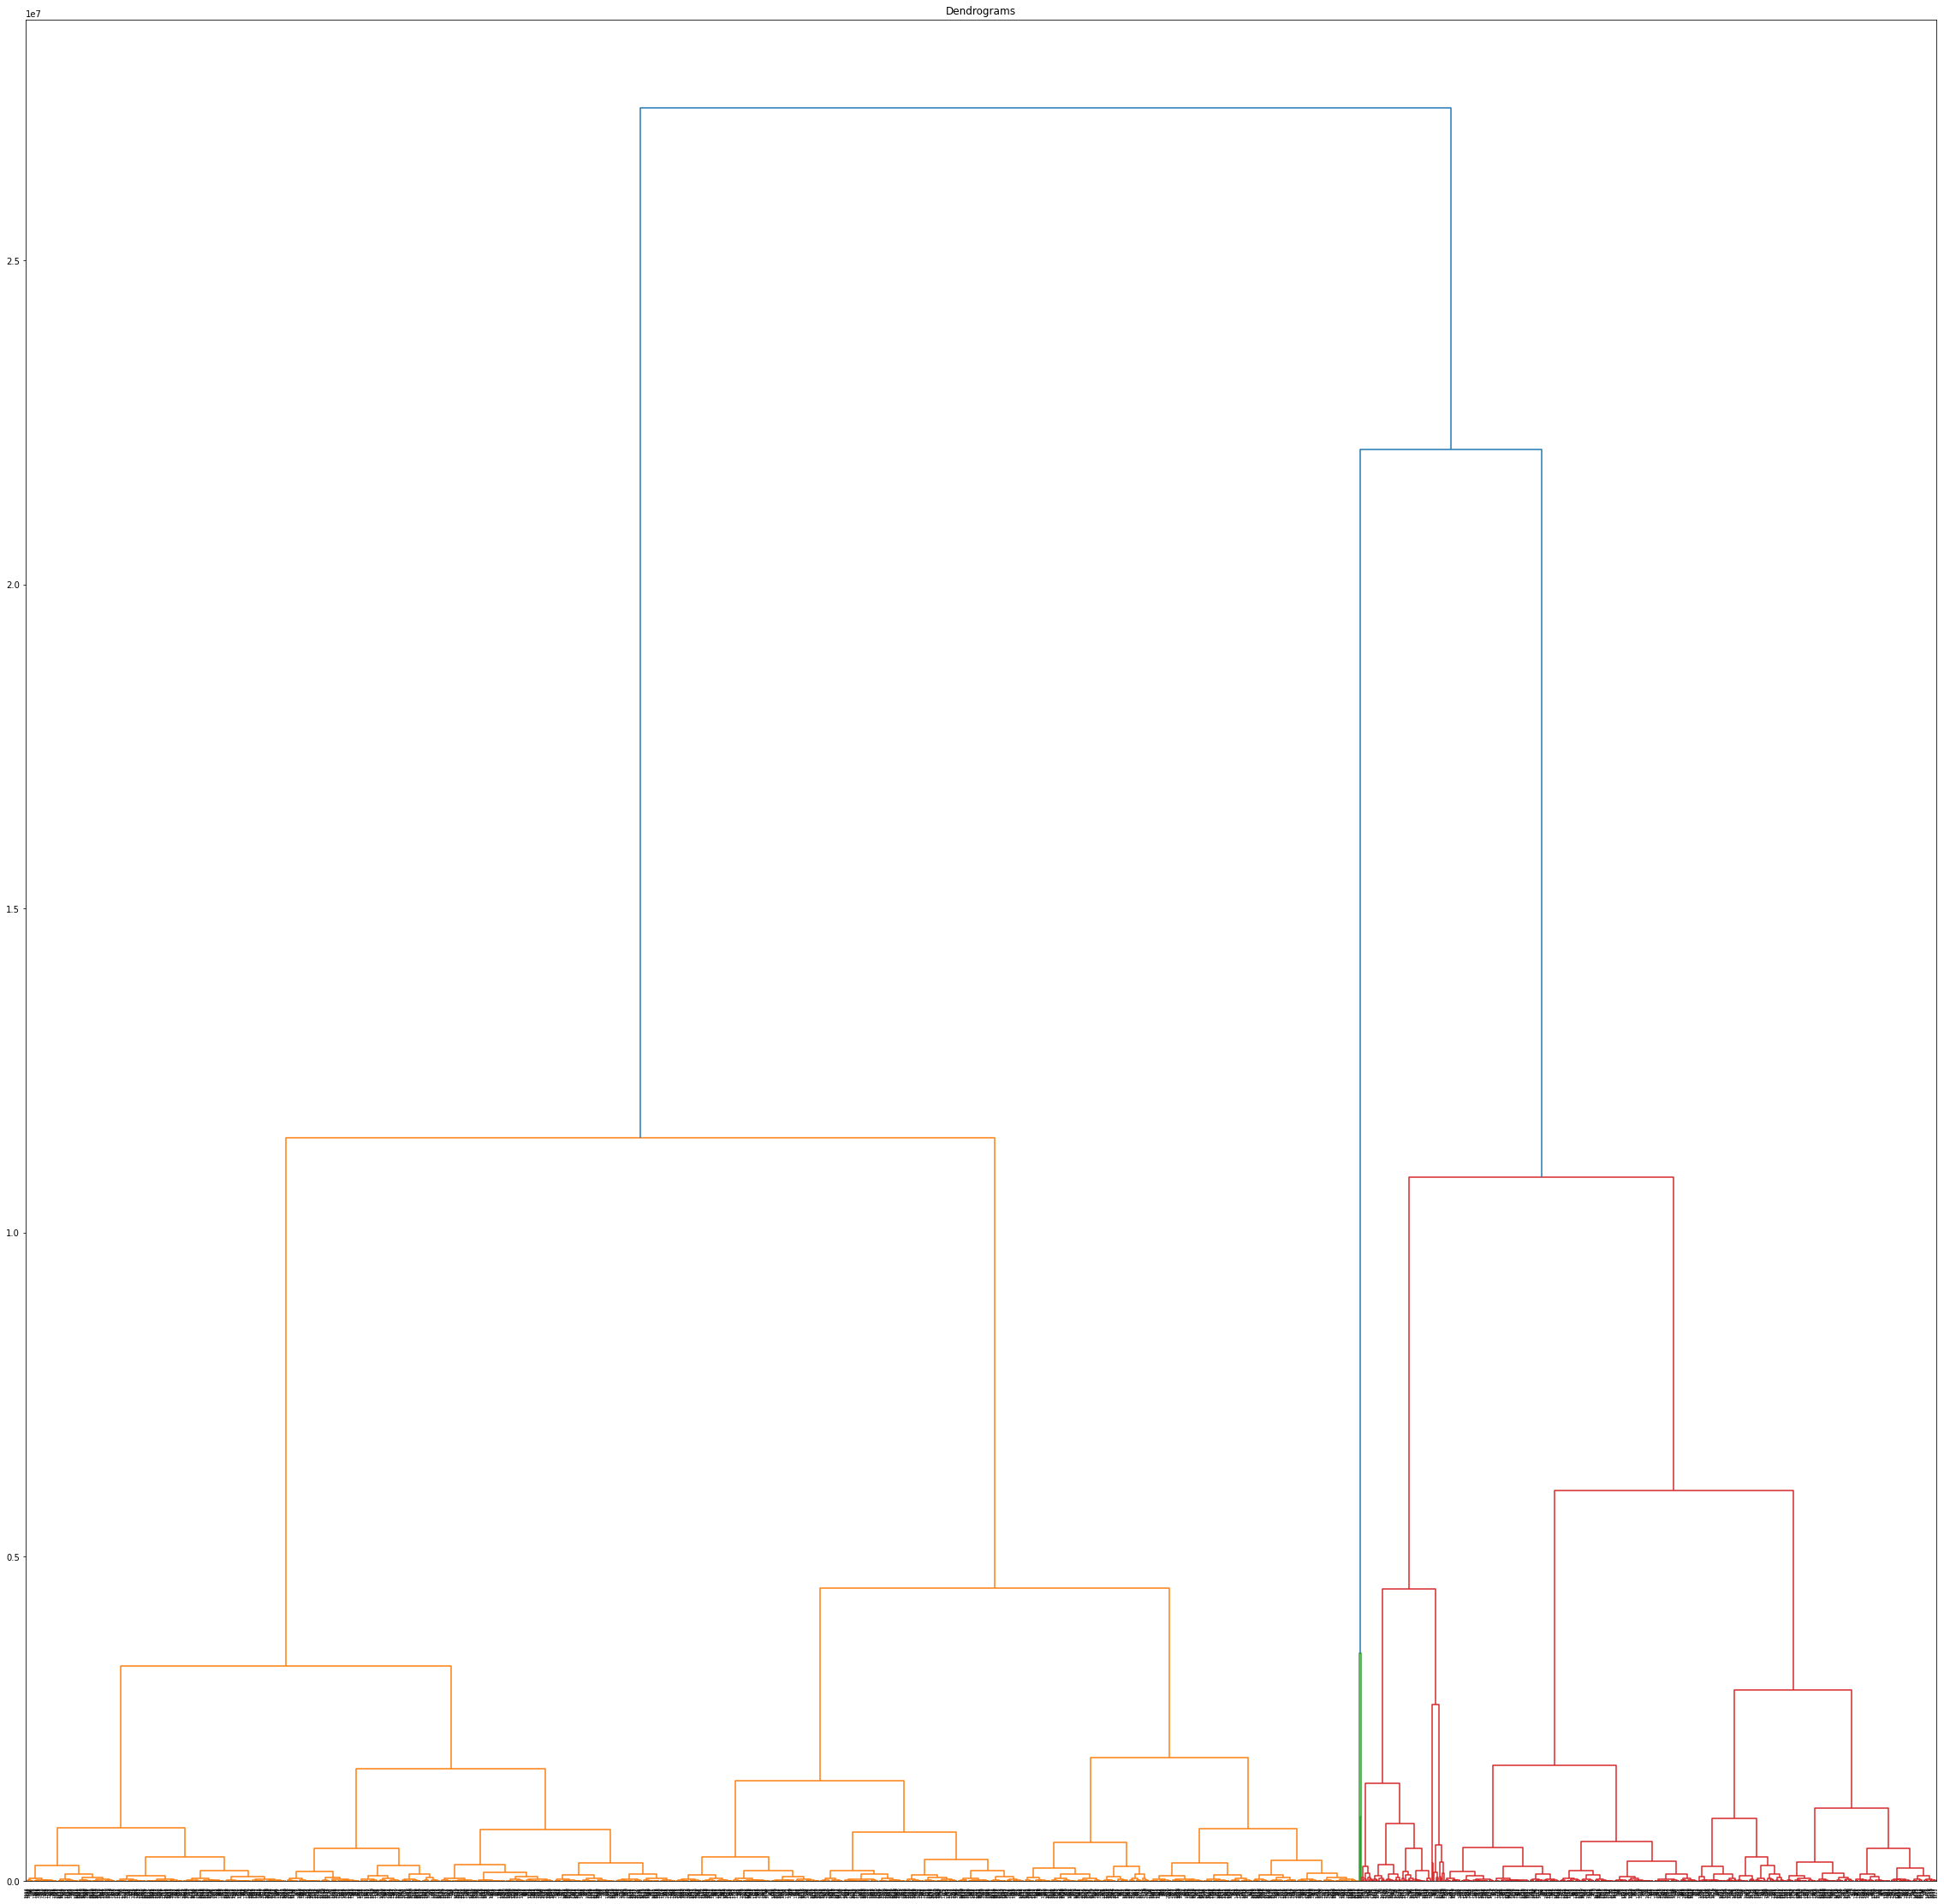

In [30]:
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(40,40))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [31]:
# Agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define the model
model = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat = model.fit(X)
yhat_2 = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(X, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(X, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(X, yhat_2)
print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.5261
Calinski Harabasz Score: 3509.4729
Davies Bouldin Score: 0.4610


# Gaussian Mixture Modelling (GMM)

In [32]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define the model
model = GaussianMixture(n_components= 26,covariance_type= "full", random_state = 10)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation score
score_dbsacn_s = silhouette_score(X, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(X, yhat)
score_dbsacn_d = davies_bouldin_score(X, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: -0.5940
Calinski Harabasz Score: 171.3862
Davies Bouldin Score: 2.9834


# Other

In [33]:
x_df = pd.DataFrame(X, columns = data)
y_df = pd.DataFrame (predictions, columns = ['cluster'])

In [34]:
y_df.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [35]:
x_df_clust = pd.concat([x_df, y_df], axis=1, join="inner")
x_df_clust.head(15)

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,WARD,SalevYB,SalevYI,cluster
0,4.0,0.0,0.0,1.0,2.0,8.0,4.0,1910.0,1988.0,1972.0,...,0.0,0.0,2.0,5.0,24.0,1680.0,1.0,93.0,31.0,0
1,3.0,1.0,1.0,1.0,2.0,9.0,5.0,1910.0,2009.0,1984.0,...,1.0,0.0,2.0,4.0,24.0,1680.0,1.0,106.0,32.0,0
2,3.0,1.0,1.0,1.0,2.0,8.0,5.0,1900.0,2003.0,1984.0,...,1.0,0.0,2.0,3.0,24.0,1680.0,1.0,106.0,22.0,0
3,3.0,2.0,1.0,1.0,1.0,10.0,5.0,1913.0,1972.0,1972.0,...,1.0,0.0,1.0,4.0,11.0,2196.0,1.0,97.0,38.0,0
4,3.0,1.0,1.0,1.0,2.0,8.0,4.0,1906.0,2011.0,1972.0,...,0.0,0.0,2.0,1.0,24.0,1627.0,1.0,105.0,39.0,0
5,3.0,1.0,0.0,1.0,2.0,7.0,3.0,1908.0,2008.0,1967.0,...,1.0,0.0,2.0,1.0,24.0,1424.0,1.0,110.0,51.0,0
6,3.0,1.0,0.0,1.0,2.0,5.0,3.0,1917.0,2000.0,1967.0,...,0.0,0.0,2.0,1.0,24.0,1815.0,1.0,94.0,44.0,0
7,3.0,1.0,0.0,1.0,1.0,8.0,3.0,1908.0,2006.0,1967.0,...,0.0,0.0,1.0,0.0,11.0,1424.0,1.0,102.0,43.0,0
8,3.0,1.0,1.0,1.0,2.0,9.0,3.0,1908.0,2013.0,1969.0,...,1.0,0.0,2.0,1.0,24.0,1424.0,1.0,93.0,32.0,1
9,3.0,1.0,1.0,1.0,1.0,14.0,5.0,1880.0,2009.0,1987.0,...,1.0,0.0,1.0,3.0,13.0,2090.0,1.0,136.0,29.0,1


In [36]:
#See Characteristic of Cluster in each variables

hasil=x_df_clust.groupby(['cluster']).agg("mean").reset_index()
hasil[['cluster', 'PRICE', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'WARD', 'SalevYB', 'SalevYI']]

,cluster,PRICE,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,...,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,WARD,SalevYB,SalevYI
0,0,1.445612e+06,3.128378,0.768581,0.959459,0.898649,1.85473,9.277027,4.190878,1901.679054,...,0.510135,0.802365,0.309122,1.895270,1.739865,19.199324,1609.469595,1.077703,111.672297,40.755068
1,1,5.447195e+05,2.122333,0.625889,1.136558,0.789474,1.41963,7.362731,3.246799,1912.558321,...,0.509957,1.108819,0.617354,1.432432,0.769559,15.244666,1313.424609,1.963016,93.807255,37.568279
2,2,1.047800e+07,5.000000,1.333333,0.333333,0.666667,1.00000,14.333333,4.666667,1920.333333,...,6.333333,2.333333,0.000000,1.333333,7.666667,11.000000,3530.000000,2.333333,92.333333,30.333333


# Demo

In [37]:
import pickle
filename = 'model_Clus_Kmeans_r.sav'
pickle.dump(kmeans, open(filename, 'wb'))
